<a href="https://colab.research.google.com/github/amnarafique/Django-another/blob/master/neural_network_regression_with_tensor_flow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction to regression with neural networks in tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# creating data to view and fit

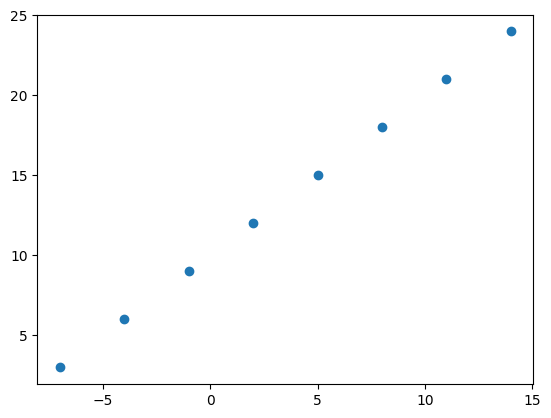

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create patterns
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0 ])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
# visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

# input and output shapes

In [ ]:
# create a dem tensor for huse price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# X = np.expand_dims(X, axis=1)
# X.shape

### Creating a model

In [ ]:
# set random seed
tf.random.set_seed(42)
# 1 creating a model using sequential api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2 compile the model
import keras
from keras import layers



model.compile(loss='mae',  #mae is short for mean absolute error
              optimizer='SGD',  #SGD is short for stochastic gradient descent
              metrics=["mse"])
# 3 Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5


ValueError: ignored

In [ ]:
import tensorflow as tf
import keras
import numpy as np
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
model.fit(X, y, epochs=5)

Epoch 1/5


ValueError: ignored

In [ ]:
# check out X, y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# try and predict using our model
y_pred = model.predict([17.0])
y_pred

ValueError: ignored

In [ ]:
y_pred + 7

NameError: ignored

### Improving our model

In [ ]:
# let's rebuild our model
# 1 create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2 Compile the model
model.compile(loss='mae', # tf.keras.losses.mae
              optimizer='SGD',
              metrics='mae')
# 3 Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# let's see if our model prediction has improved
model.predict([17.0])

ValueError: ignored

### 1 change ###

In [ ]:
# let's rebuild our model
# 1 create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# 2 Compile the model
model.compile(loss='mae', # tf.keras.losses.mae
              optimizer='SGD',
              metrics='mae')
# 3 Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:
model.predict([17.0])

ValueError: ignored

##### 2nd change try ####


In [ ]:
# let's rebuild our model
# 1 create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2 Compile the model
model.compile(loss='mae', # tf.keras.losses.mae
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics='mae')
# 3 Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:
model.predict([17.0])

#### EValuating the Model ###

In [ ]:
# Make a bigger dataset
import tensorflow as tf
X = tf.range(-100, 100, 4)
X

In [ ]:
# make labels for the dataset
y = X + 10
y

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### the 3 sets.....

In [ ]:
### the 3 sets.....
# Check the length of the sample we have
len(X)

In [ ]:
# Split the data into train and test sets
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

Visualizing the data


In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label='Trianing data')

plt.scatter(X_test, y_test, c='g', label='Testing data')

plt.legend();

In [ ]:
# let's have a look at how to build a neural network for our data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
 ])
model.compile(loss='mae',
                 optimizer='SGD',
                 metrics=['mae'])
#model.fit(X_train, y_train, epochs=100)

Visualizing the model

In [ ]:
model.summary()

In [ ]:
model.build()

In [ ]:
# lets create a model which builds automatically by defining teh input shape layer


In [ ]:
X[0], y[0]

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1])
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [ ]:
model.summary()

In [ ]:
model.summary


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

###visualizing our model's prediction

In [ ]:
import tensorflow as tf
X = tf.range(-100, 100, 4)
X
y = X + 10
y

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1])
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [ ]:
model.fit(X, y, epochs=100)

In [ ]:
model.summary()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test

In [ ]:
# plotting function
#def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
  """
  Plots training  data , test data and cmpare preditiocn to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label="Training data")
  # Plot testing data
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Shwo the legend
  plt.legend();

In [ ]:
plot_predictions

In [ ]:
plot_predictions()

# New Start

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X = np.arange(-100, 100, 4)
X
y = X + 10
y
plt.scatter(X, y);

In [ ]:
X_train = X[:40]
y_train = y[40:]

X_test = X[:40]
y_test = y[40:]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

len(x_train), len(y_train), len(x_test), len(y_test)

In [ ]:
from tensorflow.keras import layers, Sequential

In [ ]:
x_train.shape

In [ ]:
x_train_2 = np.expand_dims(x_train, axis=1)
y_train = np.expand_dims(y_train, axis=1)
x_train.shape

In [ ]:
tf.random.set_seed(42)
model = Sequential([
    layers.Dense(100, activation='relu'),
    layers.Dense(50)
])
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.legacy.Adam(0.001),
              metrics="mae")


In [ ]:
model.fit(x_train_2, y_train)

In [ ]:
x_test = np.expand_dims(x_test, axis=1)
y_Pred = model.predict(x_test)

In [ ]:
y_Pred[1].shape

### why this is not working


In [ ]:
tf.random.set_seed(42)
model = Sequential([
    layers.Dense(1, input_shape=[1])
])
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.legacy.Adam(0.001),
              metrics="mae")

In [ ]:
model.fit(X, y, epochs=100)

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### model prediction

In [ ]:
y_pred = model.predict(X_train)
y_pred

In [ ]:
y_test

### function def

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plot training data and compare predictions to the ground truth labels
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(X_train, y_train, c="b", labels="Training Data")
  plt.scatter(X_test, y_test, c="g", labels="Testing Data")
  plt.scatter(test_data, predictions, c="r", labels="Predictions")
  plt.legend();

In [ ]:
plot_predictions()

# Evaluating the model predictions with regression evaluation metrics

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = np.array([2.0, 4.0, 6.0, 8.0, 10.0, 12.0])
X


array([ 2.,  4.,  6.,  8., 10., 12.])

In [ ]:
len(X)

6

In [ ]:
y = X + 10
y


array([12., 14., 16., 18., 20., 22.])

In [ ]:
X.shape, y.shape


((6,), (6,))

In [ ]:
X_train = X[:4]
X_test = X[4:]

y_train = y[:4]
y_test = y[4:]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

len(x_train), len(y_train), len(x_test), len(y_test)

(4, 4, 2, 2)

In [ ]:
X_test, y_test


(array([10., 12.]), array([14., 20.]))

In [ ]:
y_train

array([12., 22., 16., 18.])

In [ ]:
X_train.shape, y_train.shape

((4,), (4,))

In [ ]:
len(y_train)

4

In [ ]:
X_train.shape

(4,)

In [ ]:
y_train.shape

(4,)

In [ ]:
X_test.shape, y_test.shape

((2,), (2,))

In [ ]:
from tensorflow.keras import layers, Sequential, Input

In [ ]:
model = Sequential([
  layers.Dense(100, activation='relu', input_shape=[1]),
  layers.Dense(100, activation='relu'),
  layers.Dense(1)
])
model.compile(loss='mae',
              optimizer='SGD',
              metrics=['mae', 'acc'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 738ms/step - loss: 16.2829 - mae: 16.2829 - acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 15.7573 - mae: 15.7573 - acc: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 15.2147 - mae: 15.2147 - acc: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 14.6797 - mae: 14.6797 - acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 14.1324 - mae: 14.1324 - acc: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 13.5258 - mae: 13.5258 - acc: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 12.8403 - mae: 12.8403 - acc: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 12.0404 - mae: 12.0404 - acc: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0915 - mae: 11.0915 

In [ ]:
# evaluate the model on test
model.evaluate(X, y)

1/1 [==============================] - 0s 199ms/step - loss: 3.7904 - mae: 3.7904 - acc: 0.0000e+00


[3.790395736694336, 3.790395736694336, 0.0]

In [ ]:
y_pred = model.predict(X_train)
y_pred


1/1 [==============================] - 0s 88ms/step


array([[ 6.8037004],
       [11.33063  ],
       [15.857562 ],
       [20.384487 ]], dtype=float32)

In [ ]:
y_pred.shape

(4, 1)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plot training data and compare predictions to the ground truth labels
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(X_train, y_train, c="b", label="Training Data")
  plt.scatter(X_test, y_test, c="g", label="Testing Data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();


In [ ]:
X_test.size, y_test.size

(2, 2)

In [ ]:
X_test, y_test

(array([10., 12.]), array([14., 20.]))

ValueError: ignored

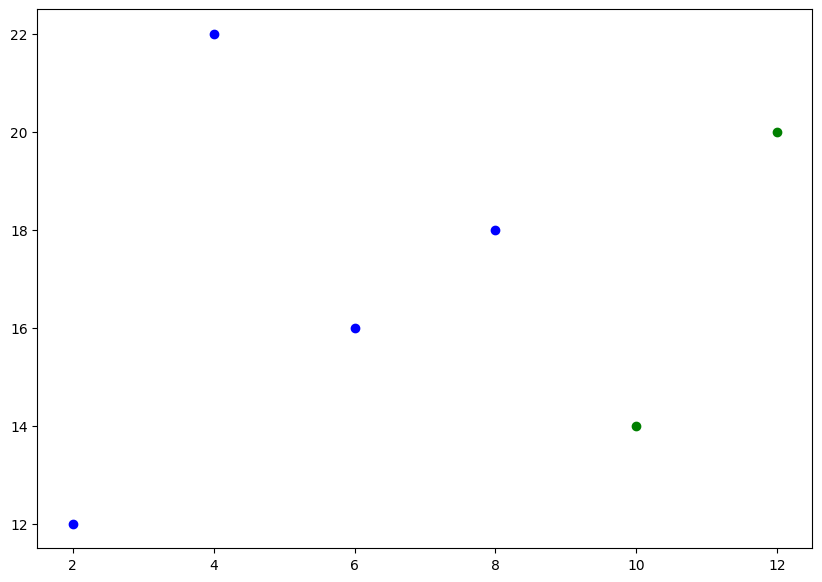

In [ ]:
plot_predictions()

In [ ]:
X.size == y.size

True

In [ ]:
X_test = np.expand_dims(X_test, axis=1)
X_test.ndim

3

In [ ]:
y_test = np.expand_dims(y_test, axis=1)
y_test.ndim

2

In [ ]:
X_test, y_test

(array([[[10.]],
 
        [[12.]]]),
 array([[14.],
        [20.]]))

In [ ]:
### calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

InvalidArgumentError: ignored

In [ ]:
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 6.8037004, 11.33063  , 15.857562 , 20.384487 ], dtype=float32)>

In [ ]:
mse = tf.keras.losses.mean_squared_error(y_true=y_pred,
                                  y_pred=y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

# Modeling experiment

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
X_train

array([2., 4., 6., 8.])

In [ ]:
import numpy as np
y_train = tf.convert_to_tensor(y_train)
y_train
y_train = np.expand_dims(y_train, axis=1)

In [ ]:
X_train.shape, y_train.shape


((4,), (4, 1, 1))

In [ ]:
X_train.ndim, y_train.ndim

(1, 3)

In [ ]:
X_train = np.expand_dims(X_train, axis=1)
X_train

array([[2.],
       [4.],
       [6.],
       [8.]])

In [ ]:
y_train = np.expand_dims(y_train, axis=1)
y_train.ndim


4

In [ ]:
y_test = np.expand_dims(y_test, axis=1)
y_test.ndim

3

In [ ]:
X_test = np.expand_dims(X_test, axis=1)
X_test.ndim

4

In [ ]:
from tensorflow.keras import layers, Sequential

model_1 = Sequential([
    layers.Dense(1)
])
model_1.compile(loss='mae',
                optimizer='SGD',
                metrics=['mae'])
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 502ms/step - loss: 10.1582 - mae: 10.1582
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 9.8982 - mae: 9.8982
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 9.6382 - mae: 9.6382
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 9.4003 - mae: 9.4003
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 9.2327 - mae: 9.2327
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0650 - mae: 9.0650
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.8974 - mae: 8.8974
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7297 - mae: 8.7297
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.5620 - mae: 8.5620
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 8.3944 - mae: 8.3944
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - 

1/1 [==============================] - 0s 81ms/step


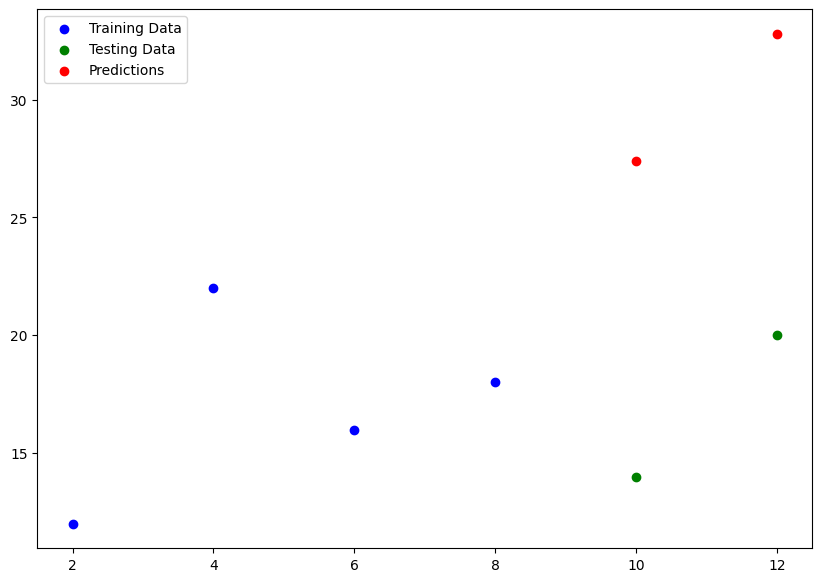

In [ ]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# calculate model_1 evaluation metrics
mae_1 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_1))
mse_1 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds_1))
tf.squeeze(mae_1.numpy()), tf.squeeze(mse_1.numpy())

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([16.099468, 10.099468], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([266.43362, 109.23999], dtype=float32)>)

### Model 2

In [ ]:
tf.random.set_seed(42)

model_2 = Sequential([
    layers.Dense(10),
    layers.Dense(1)
])
model_2.compile(loss='mae',
                optimizer='SGD',
                metrics=['mse'])
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 433ms/step - loss: 19.7984 - mse: 406.5435
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 19.1176 - mse: 379.4000
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 18.4624 - mse: 354.3151
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 17.8259 - mse: 330.9234
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 17.2016 - mse: 308.9114
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 16.5829 - mse: 288.0120
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 15.9637 - mse: 267.9992
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 15.3374 - mse: 248.6852
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 14.6978 - mse: 229.9189
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0384 - mse: 211.5861
Epoch 11/100
1/1 [=====================

1/1 [==============================] - 0s 103ms/step


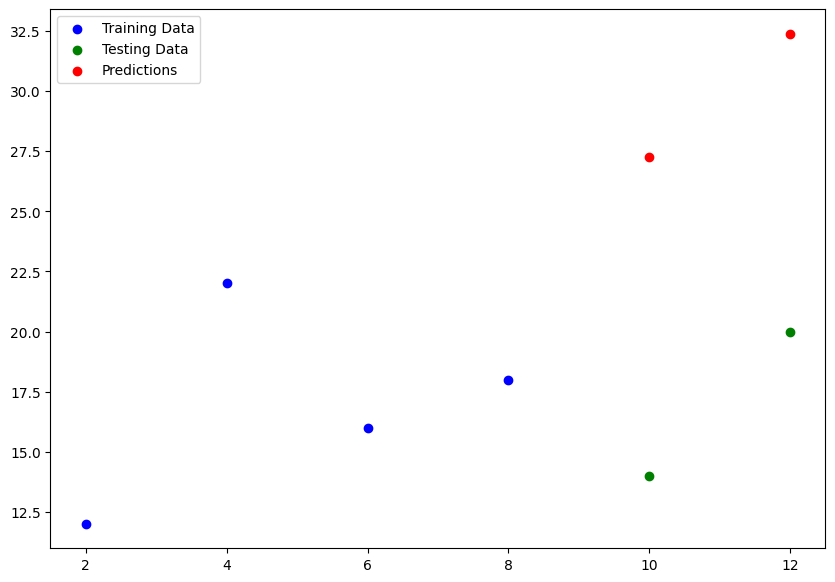

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_2))
mse_2 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds_2))
tf.squeeze(mae_2.numpy()), tf.squeeze(mse_2.numpy())

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([15.82902,  9.82902], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([257.1116  , 103.163376], dtype=float32)>)

# Model 3

In [ ]:
tf.random.set_seed(42)

model_3 = Sequential([
    layers.Dense(10),
    layers.Dense(1)
])
model_3.compile(loss='mae',
                optimizer='SGD',
                metrics=['mae'])
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 423ms/step - loss: 14.9816 - mae: 14.9816
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 13.9556 - mae: 13.9556
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 12.9034 - mae: 12.9034
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 11.8143 - mae: 11.8143
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 10.6771 - mae: 10.6771
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 9.4805 - mae: 9.4805
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 8.4537 - mae: 8.4537
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 7.5857 - mae: 7.5857
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 6.9928 - mae: 6.9928
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 6.7447 - mae: 6.7447
Epoch 11/500
1/1 [==============================] - 0s 10ms

1/1 [==============================] - 0s 464ms/step


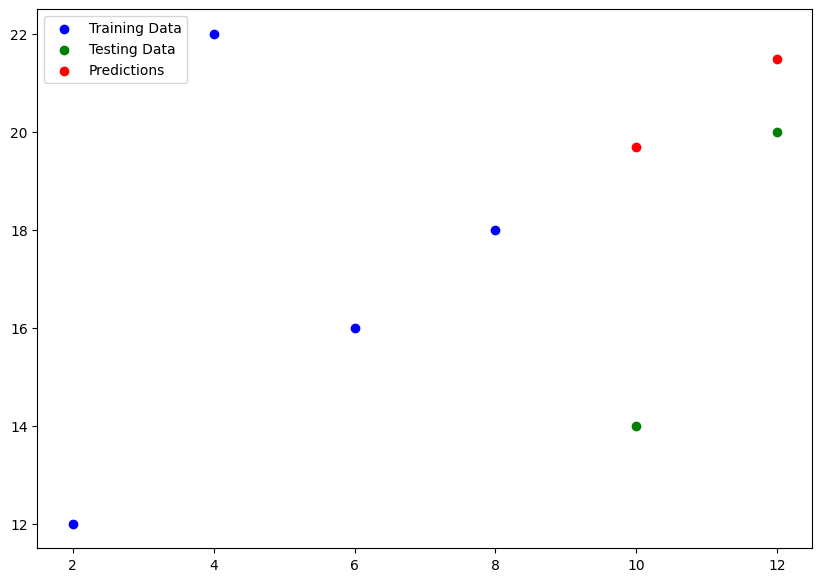

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_3))
mse_3 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds_3))
tf.squeeze(mae_3.numpy()), tf.squeeze(mse_3.numpy())

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([6.594157 , 0.9004965], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([44.293804 ,  1.1639167], dtype=float32)>)

# comparing and tracking your modeling experiments

In [ ]:
# comparing model using panda dataframe
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model_results = [["model_1", tf.squeeze(mae_1.numpy()), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results,columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,"(tf.Tensor(16.099468, shape=(), dtype=float32)...","[[266.43362], [109.23999]]"
1,model_2,"[[15.82902], [9.82902]]","[[257.1116], [103.163376]]"
2,model_3,"[[6.594157], [0.9004965]]","[[44.293804], [1.1639167]]"


In [ ]:
model_2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Save the model

In [ ]:
model_2.save('my_model.h5')

# Loading the data

In [ ]:
Loaded = tf.keras.models.load_model('/content/my_model.h5')
Loaded.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Larger example

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the csv
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
Insurance_one_hot = pd.get_dummies(insurance)
Insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = Insurance_one_hot.drop("charges", axis=1)
y = Insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

# build a neural network and learning the relation between 2
model_2.summary()

In [ ]:
tf.random.set_seed(42)
insurance_model = Sequential([
    layers.Dense(10),
    layers.Dense(1)
])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8742.6221 - mae: 8742.6221
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7883.6777 - mae: 7883.6777
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7534.3657 - mae: 7534.3657
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7740.0088 - mae: 7740.0088
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7666.4346 - mae: 7666.4346
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7612.4619 - mae: 7612.4619
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7565.5396 - mae: 7565.5396
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7744.6812 - mae: 7744.6812
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7550.6221 - mae: 7550.6221
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7657.4419 - mae: 7657.4419

In [ ]:
# check the results
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 6917.7227 - mae: 6917.7227


[6917.72265625, 6917.72265625]

In [ ]:
tf.random.set_seed(42)
insurance_model_2 = Sequential([
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13287.1484 - mae: 13287.1484
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13114.0557 - mae: 13114.0557
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12753.1455 - mae: 12753.1455
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12039.3066 - mae: 12039.3066
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10852.1973 - mae: 10852.1973
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9368.1484 - mae: 9368.1484
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8063.0942 - mae: 8063.0942
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7509.5586 - mae: 7509.5586
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7427.6963 - mae: 7427.6963
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7406.9028 - mae:

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4633.3438 - mae: 4633.3438


[4633.34375, 4633.34375]

In [ ]:
tf.random.set_seed(42)
insurance_model_3 = Sequential([
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])
history = insurance_model_3.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13276.8574 - mae: 13276.8574
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13086.3770 - mae: 13086.3770
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12698.0186 - mae: 12698.0186
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 11966.4385 - mae: 11966.4385
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 10790.7441 - mae: 10790.7441
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 9352.3164 - mae: 9352.3164
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 8084.3364 - mae: 8084.3364
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7524.7979 - mae: 7524.7979
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7438.4854 - mae: 7438.4854
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7419.2065 - mae:

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.2056 - mae: 3171.2056


[3171.20556640625, 3171.20556640625]

Text(0.5, 0, 'epochs')

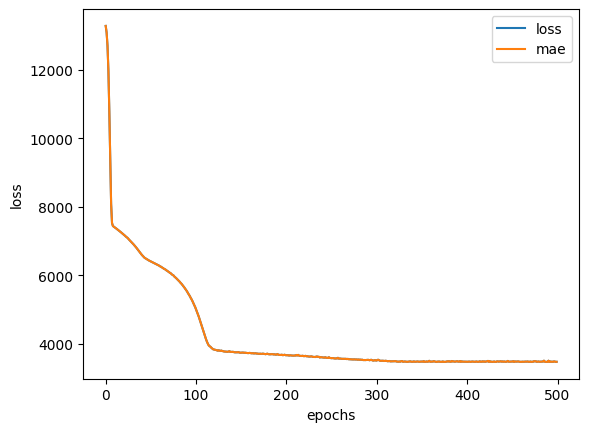

In [ ]:
# plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing Data

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create  a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and y values
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the coloumn transformer to training data
ct.fit(X_train)

# Transforming traning and test data with normalization(MinMaxScalar and OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
# what does our data looks like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
# Build neural netwrok model to fit on our normalize data
from tensorflow.keras import layers, Sequential

tf.random.set_seed(42)

insurance_model_4 = Sequential([
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer='Adam',
                          metrics=['mae'])
insurance_model_4.fit(X_train_normal, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.0107 - mae: 13343.0107
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13332.3975 - mae: 13332.3975
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13306.6650 - mae: 13306.6650
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13254.0488 - mae: 13254.0488
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13163.4121 - mae: 13163.4121
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13024.0684 - mae: 13024.0684
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12826.0811 - mae: 12826.0811
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12559.5879 - mae: 12559.5879
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12214.0674 - mae: 12214.0674
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11789.18

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3435.6887 - mae: 3435.6887


[3435.688720703125, 3435.688720703125]